In [105]:
import torch
import matplotlib.pyplot as plt
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [106]:
loaded_reward_dict = torch.load('/Users/noahf/Downloads/AIRL_with_progress-main/replayed_traj/g_memo.pt')
loaded_reward_dict = {k: v for k, v in loaded_reward_dict.items() if v}

In [107]:
# 计算每个键的总reward
total_rewards_per_key = {key: sum(rewards) for key, rewards in loaded_reward_dict.items()}

In [108]:
# read trajectories from folder bags

nop = 40
trajectories = []
progresses = []
steps = []
scalars = []
ind = []

for i in range(nop):
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "/Users/noahf/Downloads/AIRL_with_progress-main/bags/user_"+str(i)+"/0_poses.txt"
    step_path = "/Users/noahf/Downloads/AIRL_with_progress-main/bags/user_"+str(i)+"/0_step.txt"
    progress_path = "/Users/noahf/Downloads/AIRL_with_progress-main/bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "/Users/noahf/Downloads/AIRL_with_progress-main/bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))
print(ind)

34
34
34
34
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38]


In [ ]:
cumulative_rewards = {}
for key in ind:
    # 计算每个size/10的reward总和
    total_length = len(loaded_reward_dict[key]) # 计算reward总长度
    size = total_length // 10  # 计算每个区间的大小
    cumulative_rewards[key] = [0] * 10  # 初始化累计奖励列表
    # 计算该key的总reward
    total_reward = total_rewards_per_key[key]
    # 累计计算每个区间的reward总和
    for i in range(10):
        interval_sum = 0
        # 对于每个键，计算该区间内的reward总和
        interval_sum += sum(loaded_reward_dict[key][i*size:(i+1)*size])
        cumulative_rewards[key][i] = interval_sum if i == 0 else cumulative_rewards[key][i-1] + interval_sum
    # 设置图形的横纵坐标值
    intervals = [(i+1) for i in range(10)]
    cumulative_rewards[key] = [cumulative_rewards[key][i] for i in range(10)]


In [ ]:
cumulative_rewards = {key: [(value - min(cumulative_rewards[key])) / (max(cumulative_rewards[key]) - min(cumulative_rewards[key])) * 100 for value in cumulative_rewards[key]] for key in cumulative_rewards}


In [ ]:
print(cumulative_rewards)

In [ ]:
scalars = np.array(scalars) - 50
scalars = np.cumsum(scalars, axis=1)

min_scalar = np.min(scalars, axis=1)
max_scalar = np.max(scalars, axis=1)
rescaled_scalars = (scalars - min_scalar[:, np.newaxis]) / (max_scalar[:, np.newaxis] - min_scalar[:, np.newaxis]) * 100


In [ ]:
for i, item in enumerate(cumulative_rewards.values()):
    intervals = [(i+1) for i in range(10)]
    plt.plot(intervals, item, marker='o', label='Cumulative Rewards')  
    plt.plot(intervals, progresses[i], marker='o', label='Progress')  
    plt.plot(intervals, scalars[i], marker='o', label='Scalars')  
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/Users/noahf/Downloads/AIRL_with_progress-main/fig/disc_g/user_{i}.png')
    plt.show()

In [ ]:
for i, item in enumerate(cumulative_rewards.values()):
    intervals = [(i+1) for i in range(10)]
    plt.plot(intervals, item, marker='o', label='Cumulative Rewards')  
    plt.plot(intervals, progresses[i], marker='o', label='Progress')  
    plt.plot(intervals, rescaled_scbalars[i], marker='o', label='Cumulative Scalars')  
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/Users/noahf/Downloads/AIRL_with_progress-main/fig/disc_g/user_{i}.png')
    plt.show()

In [ ]:
from scipy import stats

In [112]:
scalars

[[90, 100, 100, 50, 70, 80, 80, 85, 85, 85],
 [10, 100, 100, 10, 100, 50, 0, 90, 90, 80],
 [98, 100, 100, 70, 100, 100, 100, 90, 100, 100],
 [100, 100, 100, 100, 100, 90, 85, 90, 80, 80],
 [50, 60, 30, 50, 10, 75, 30, 30, 30, 80],
 [100, 100, 100, 100, 95, 100, 95, 100, 100, 100],
 [90, 90, 85, 90, 90, 90, 90, 90, 90, 90],
 [60, 60, 70, 70, 70, 60, 80, 80, 50, 50],
 [100, 100, 100, 100, 90, 90, 90, 90, 95, 95],
 [80, 80, 70, 70, 80, 60, 60, 65, 70, 70],
 [70, 40, 30, 60, 70, 90, 85, 65, 90, 100],
 [25, 50, 70, 35, 80, 90, 30, 70, 100, 100],
 [60, 50, 38, 60, 80, 95, 95, 100, 100, 100],
 [50, 60, 70, 40, 60, 40, 70, 30, 80, 100],
 [90, 5, 20, 80, 90, 90, 100, 80, 20, 0],
 [85, 65, 50, 80, 60, 40, 80, 70, 70, 70],
 [90, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [10, 50, 30, 60, 70, 75, 85, 90, 90, 90],
 [100, 80, 100, 100, 100, 100, 100, 100, 100, 95],
 [10, 80, 85, 90, 90, 90, 90, 90, 95, 100],
 [60, 80, 80, 80, 90, 95, 10, 20, 60, 40],
 [86, 75, 3, 65, 45, 90, 100, 100, 92, 50],
 [100, 100, 100, 10

In [111]:
correlation_scalars_rewards = []
correlation_progresses_rewards = [] 
correlation_progreses_scalars = []
correlation_s_non_accumu_rewards = []
for i, item in enumerate(cumulative_rewards.values()):
    correlation_progresses_rewards.append(stats.pearsonr(item, progresses[i]))
    correlation_scalars_rewards.append(stats.pearsonr(item, rescaled_scalars[i]))
    correlation_progreses_scalars.append(stats.pearsonr(progresses[i], scalars[i]))
    correlation_s_non_accumu_rewards.append(stats.pearsonr(item, scalars[i]))

<Axes: xlabel='Type', ylabel='Correlation'>

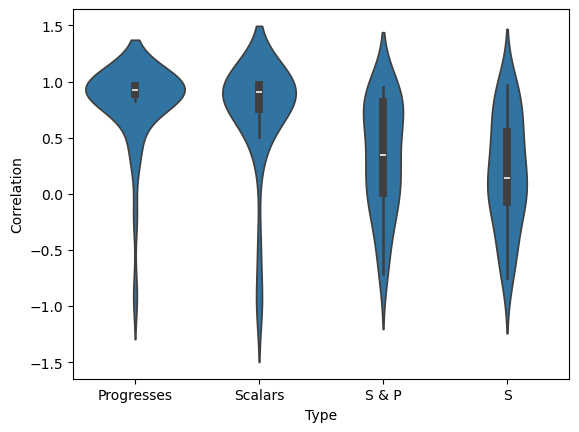

In [113]:
import seaborn as sns
import pandas as pd
# Combine the two correlation lists into a single dataframe
correlation_df = pd.DataFrame({'Correlation': [item[0] for item in correlation_progresses_rewards + correlation_scalars_rewards + correlation_progreses_scalars + correlation_s_non_accumu_rewards],
                               'Type': ['Progresses'] * len(correlation_progresses_rewards) + ['Scalars'] * len(correlation_scalars_rewards) + ['S & P'] * len(correlation_progreses_scalars) + ['S'] * len(correlation_s_non_accumu_rewards)})

# Draw the violin plot
sns.violinplot(x='Type', y='Correlation', data=correlation_df)
